In [15]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 설정
plt.style.use('ggplot')
sns.set(font_scale=1.2)
%matplotlib inline

In [16]:
# GitHub에서 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"
df = pd.read_csv(url)

# 데이터 형태 확인
print(f"데이터셋 크기: {df.shape}")
print("\n처음 5개 행:")
df.head()

데이터셋 크기: (891, 12)

처음 5개 행:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# 컬렴명 확인
df.columns
df['Survived'].value_counts()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

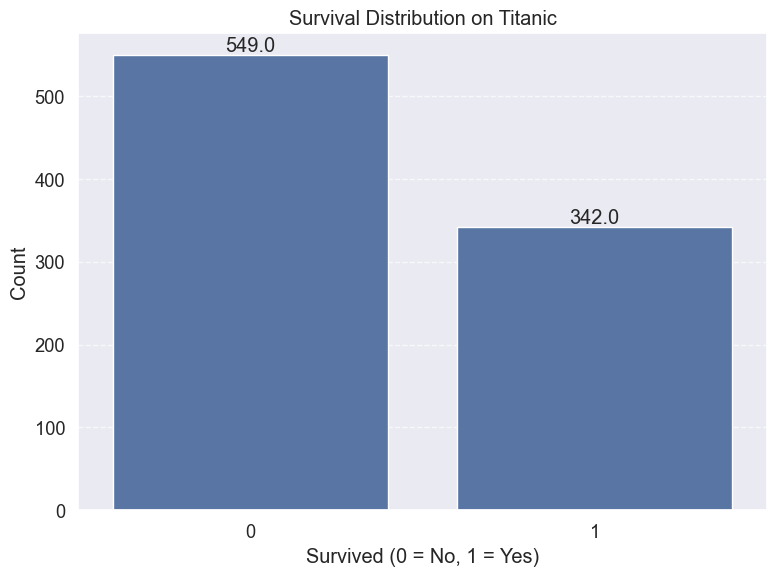

In [21]:
# 생존 여부 분포 확인 (그래프)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Survival Distribution on Titanic")

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

# Add colors to make it more interpretable

# Improve the aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

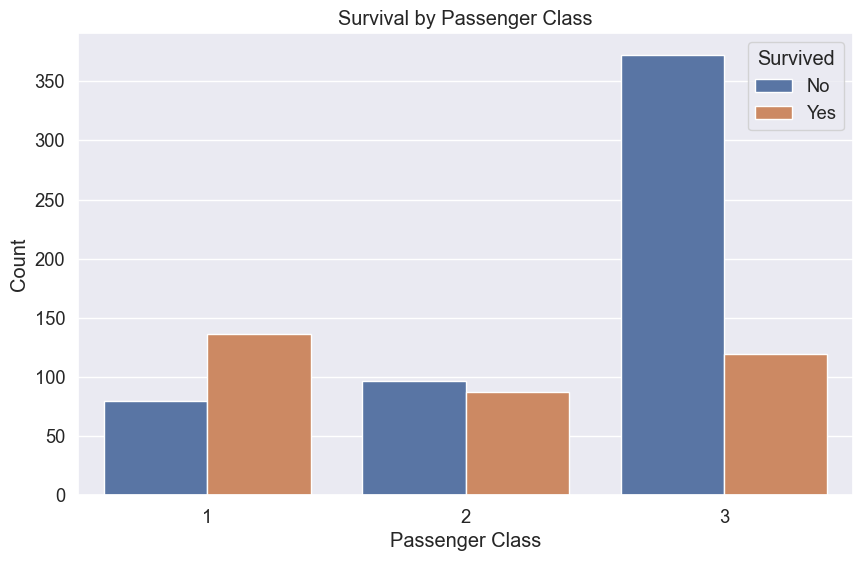

In [22]:
# 승객 등급별 생존율 확인
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.title("Survival by Passenger Class")
plt.legend(title="Survived", labels=["No", "Yes"])